<h1>Sai Krishna
<h1>PH22MSCST11003


<h1>Question 1
    <h4>Download the asteroid dataset from http://astrostatistics.psu.edu/
datasets/asteroid_dens.dat. Apply the Shapiro-Wilk test to both the
asteroid density values and the natural logarithm of the density values.
From the p values, which of these is closer to a Gaussian distribution?<br>
Verify this by plotting histograms of both density and its logarithm and
overlaying the best-fit normal distribution (Look up stats.norm.fit) 

In [136]:
d= {
    "Ceres": [2.12, 0.04],
    "Pallas": [2.71, 0.11],
    "Vesta": [3.44, 0.12],
    "Hygiea": [2.76, 1.20],
    "Parthenope": [2.72, 0.12],
    "Eunomia": [0.96, 0.30],
    "Psyche": [2.00, 0.60],
    "Massalia": [3.26, 0.60],
    "Kalliope": [2.50, 0.30],
    "Eugenia": [1.20, 0.40],
    "Sylvia": [1.62, 0.30],
    "Antiope": [1.30],
    "Hermione": [1.96, 0.34],
    "Ida": [2.60, 0.50],
    "Mathilde": [1.30, 0.20],
    "Eros": [2.67, 0.03],
    "Interamnia": [4.40, 2.10],
    "Pulcova": [1.80, 0.80],
    "Hispania": [4.90, 3.90],
    "KW4": [2.39, 0.90],
    "DP107": [1.62, 1.05],
    "UG11": [1.47, 0.95],
    "Frostia": [0.89, 0.13],
    "Tama": [2.52, 0.30],
    "Berna": [1.21, 0.25],
    "Debussy": [0.90, 0.10],
    "Patroclus": [0.80, 0.15]
}



p value of density : 0.051220282912254333
p value of density : 0.5660613775253296


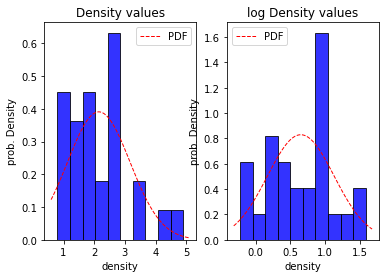

In [137]:
den_val = [value[0] for value in d.values()]
print("p value of density :", stats.shapiro(den_val)[1])
print("p value of density :", stats.shapiro(np.log(den_val)) [1])
plt.subplot(1,2,1)
plt.hist(den_val,bins=10,density=True,alpha=0.8, color='blue',edgecolor='black')
xmin,xmax=plt.xlim()
xden=np.linspace(xmin,xmax,100)
p_den=stats.norm.pdf(xden,np.mean(den_val),np.std(den_val))
plt.plot(xden,p_den,'r--',linewidth=1,label='PDF')
plt.title('Density values')
plt.xlabel('density')
plt.ylabel('prob. Density')
plt.legend()

plt.subplot(1,2,2)
plt.hist(np.log(den_val),bins=10,density=True,alpha=0.8, color='blue',edgecolor='black')
xmin,xmax=plt.xlim()
xden=np.linspace(xmin,xmax,100)
m,std=stats.norm.fit(np.log(den_val))
p_den1=stats.norm.pdf(xden,m,std)
plt.plot(xden,p_den1,'r--',linewidth=1,label='PDF')
plt.title('log Density values')
plt.xlabel('density')
plt.ylabel('prob. Density')

plt.legend()

<h1>Question 2
    <h4>Download the Hipparcos star catalog from http://iith.ac.in/~shantanud/
HIP_star.dat. Detailed explanation of the columns in this dataset can be
found in http://astrostatistics.psu.edu/datasets/HIP_star.html under “Dataset”. Calculate using two-sample t-test whether the color (B-
V) of the Hyades stars differs from the non-Hyades ones. <br>The Hyades

stars have Right Ascension between 50◦ and 100◦, declinations between
0 and 25◦, proper motion in RA between 90 and 130 mas/year, proper
motion in DEC between -60 and -10 mas/year. Any other star which does
not satisfy any of the above conditions is considered a non-Hyades star.

In [138]:
import pandas as pd
from scipy import stats
import requests
from io import StringIO
da=requests.get("https://people.iith.ac.in/shantanud/HIP_star.dat")
dat=pd.read_csv(StringIO(da.text), delim_whitespace=True)

In [139]:
xx=dat

In [140]:
import numpy as np


x = np.genfromtxt("https://iith.ac.in/~shantanud/HIP_star.dat", skip_header=1)


x = np.column_stack([x, np.ones(len(x))])

mask_hyades = (x[:, 2] > 50) & (x[:, 2] < 100) & (x[:, 3] > 0) & (x[:, 3] < 25) & \
              (x[:, 5] > 90) & (x[:, 5] < 130) & (x[:, 6] > -60) & (x[:, 6] < -10) & \
              (x[:, 7] < 5) & (x[:, 8] < 0.2)

# Extract Hyades and non-Hyades stars
hyades = x[mask_hyades]
non_hyades = x[~mask_hyades]


data1 = hyades[:, -2]
data2 = non_hyades[:, -2]


data2 = data2[~np.isnan(data2)]


In [141]:
print("variance of hyades:",np.var(data1))
print("variance of non_hyades:",np.var(data2))

print("t-statistic: ",stats.ttest_ind(data1,data2,equal_var=False)[0])
print("p-value of the 2 sample t-test : ",stats.ttest_ind(data1,data2,equal_var=False)[1])


variance of hyades: 0.001848
variance of non_hyades: 0.10768933532979119
t-statistic:  -30.467874175004038
p-value of the 2 sample t-test :  6.291256969608912e-08


<h6>The p-value is significantly less than 0.05, indicating that we reject the null hypothesis, which suggests that the colors of stars in the Hyades and non-Hyades categories are identical. Therefore, the two star categories exhibit different colors.

<h1>Question 3<h4>The T90 distribution for Beppo-Sax T90 data can be found at http:
//www.iith.ac.in/~shantanud/beppoSax.txt. Apply GMM to log10 of
T90 data and find the optimum number of components using AIC and
BIC by plotting BIC as a function of number of componts 
(Hint: Look at the source code for astroML figure 6.6)

In [142]:

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.mixture import GaussianMixture

from astroML.datasets import fetch_sdss_sspp
from astroML.utils.decorators import pickle_results
from astroML.plotting.tools import draw_ellipse


In [143]:
X = np.loadtxt("beppoSax.txt")
X=np.log10(X)
print(type(X))
N = np.arange(1, 14)


<class 'numpy.ndarray'>


1
2
3
4
5
6
7
8
9
10
11
12
13
best fit converged: True
BIC: n_components = 2
AIC: n_components = 2


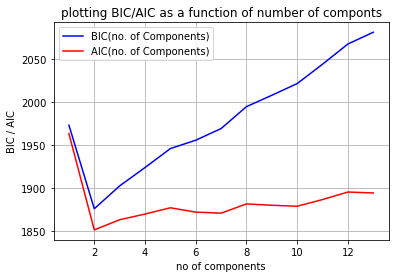

In [145]:
def compute_GaussianMixture(N, X, covariance_type='full', max_iter=1000):
    models = [None for n in N]
    for i in range(len(N)):
        print(N[i])
        models[i] = GaussianMixture(n_components=N[i], max_iter=max_iter,
                                    covariance_type=covariance_type)
        # Convert X to 2D array with a single feature column
        X_2d = X[:, np.newaxis]
        models[i].fit(X_2d)  # Fit the model
    return models

# Modify the call to compute_GaussianMixture to include the data X
models = compute_GaussianMixture(N, X)

# Calculate AIC and BIC
AIC = [m.aic(X[:, np.newaxis]) for m in models]  # Convert X to 2D array for AIC calculation
BIC = [m.bic(X[:, np.newaxis]) for m in models]  # Convert X to 2D array for BIC calculation

# Find the index of the model with the lowest BIC
i_best = np.argmin(BIC)
i_best2 = np.argmin(AIC)
gmm_best = models[i_best]
print("best fit converged:", gmm_best.converged_)
print("BIC: n_components = %i" % N[i_best])
print("AIC: n_components = %i" % N[i_best2])


plt.plot(N, BIC, label='BIC(no. of Components)', color='blue', linestyle='-')
plt.plot(N, AIC, label='AIC(no. of Components)', color='Red', linestyle='-')
plt.xlabel('no of components')
plt.ylabel('BIC / AIC')
plt.title('plotting BIC/AIC as a function of number of componts')
plt.legend()
plt.grid(True)
plt.show()